## Libraries that will be used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Exploratory data analysis & data cleasing

In [2]:
df = pd.read_csv('winequality.csv', delimiter=';', sep='.')

In [3]:
print('data shape', df.shape)
df.head()

data shape (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [5]:
df.max()

type                                  White
fixed acidity                          15.9
volatile acidity                       1.58
citric acid                            1.66
residual sugar                         65.8
chlorides                             0.611
free sulfur dioxide                     289
total sulfur dioxide                    440
density                             103.898
pH                                     4.01
sulphates                                 2
alcohol                 973.333.333.333.333
quality                                   9
dtype: object

In [6]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object

In [7]:
# data cleasing: some columns, like alcohol, have a rows with no meaning. For this reason it will be removed 
# from the data frame values with more than 10 digitis

columns = ['fixed acidity', 'volatile acidity', 'citric acid',
           'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 
           'alcohol', 'quality']

for col in columns:
    df = df[[(len(str(x)) <= 10) for x in df[col]]]
    #df = df[df[col].map(len) <= 6]
    df[col] = df[col].astype(float)

In [8]:
# After the data cleasing all the columns, except type, have float values

df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

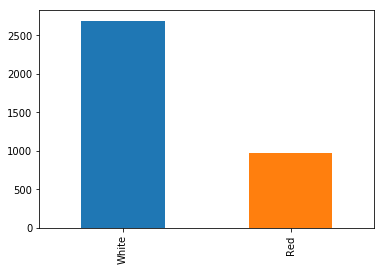

In [9]:
# How many wines of each type?

df['type'].value_counts().plot(kind='bar');

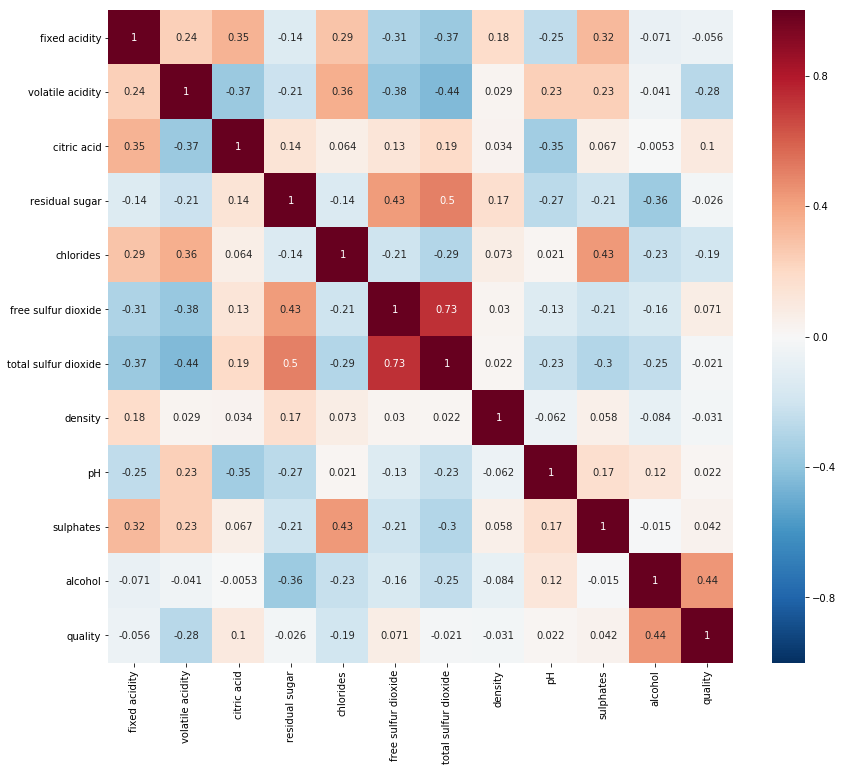

In [10]:
# correlation

plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, linewidths=0, vmin=-1, cmap="RdBu_r");

The alcohol feature is the one with higher correlation with quality.

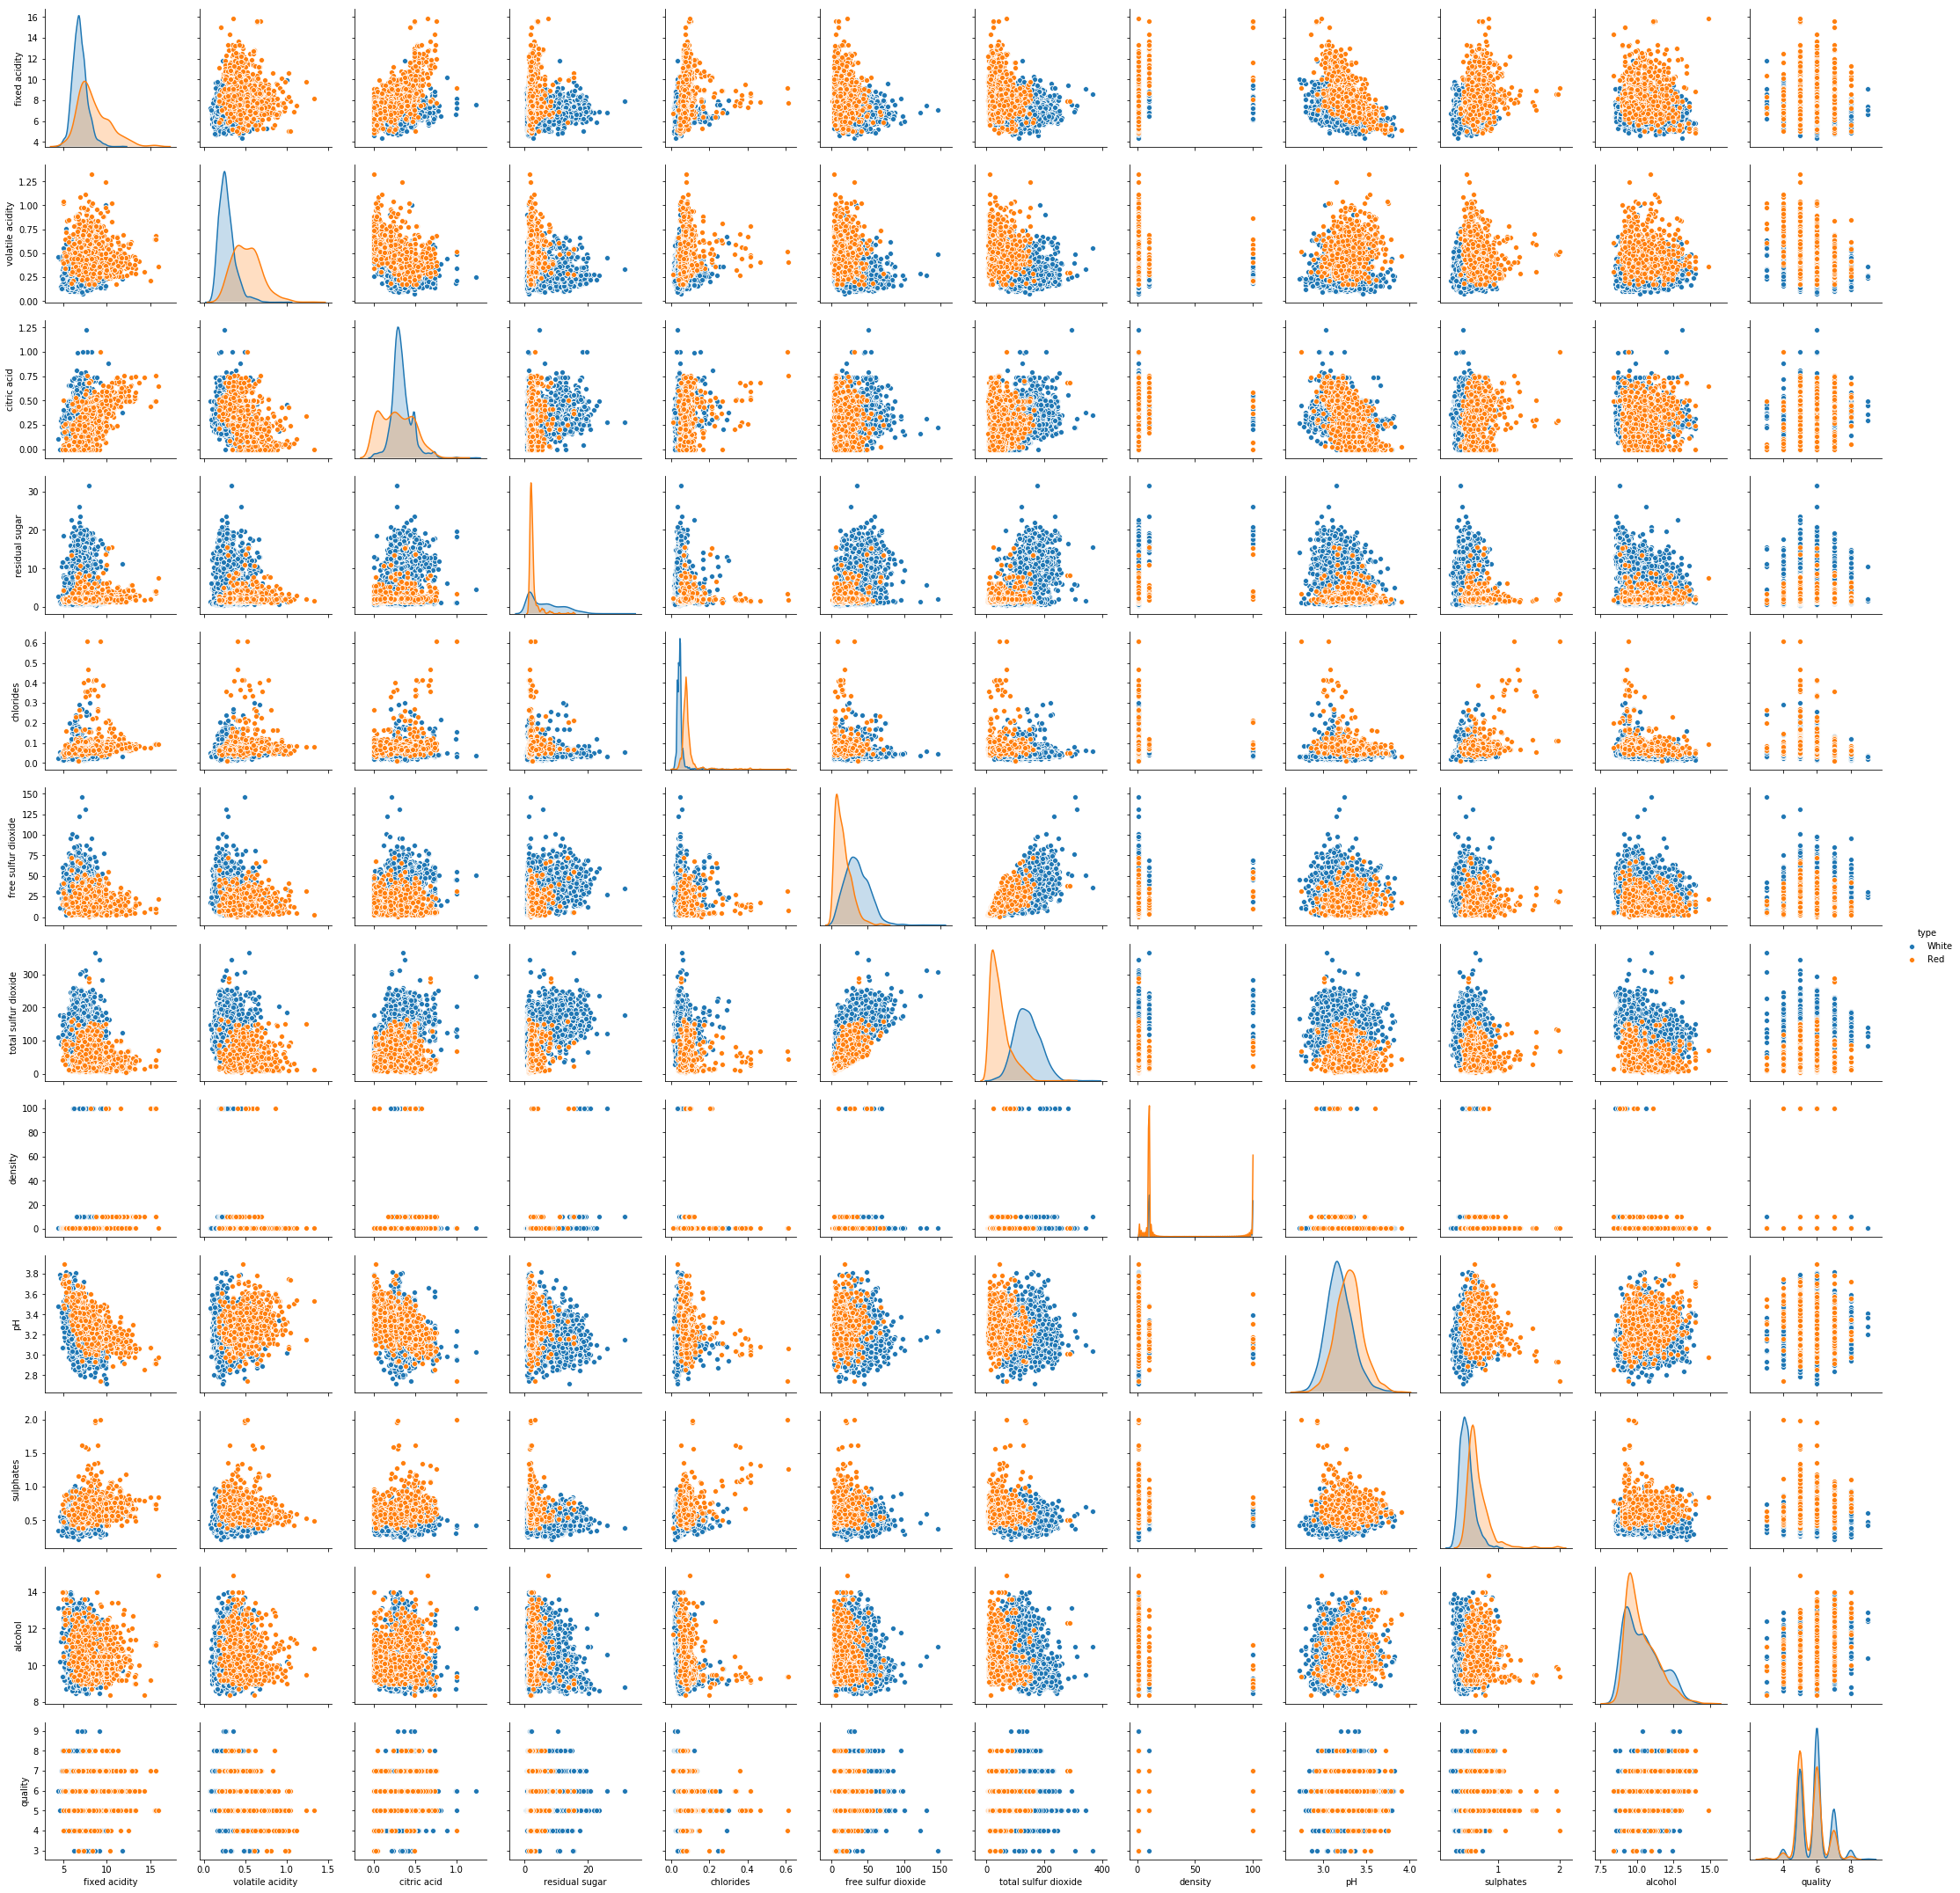

In [11]:
# let's look at whether features values change much from one type of wine to another

sns.pairplot(df, hue='type');

fixed acidity


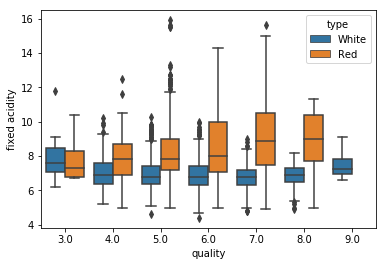

volatile acidity


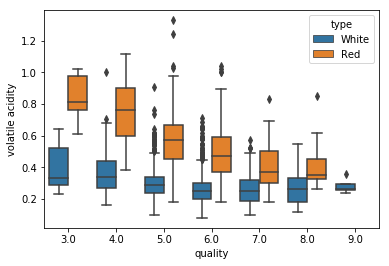

citric acid


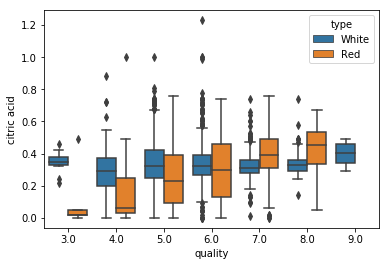

residual sugar


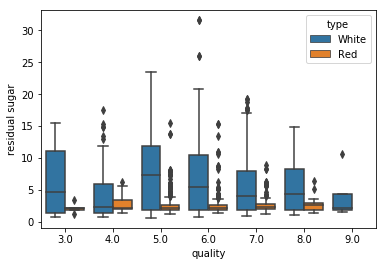

chlorides


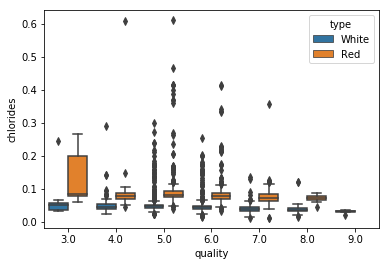

free sulfur dioxide


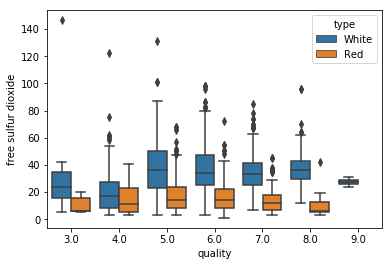

total sulfur dioxide


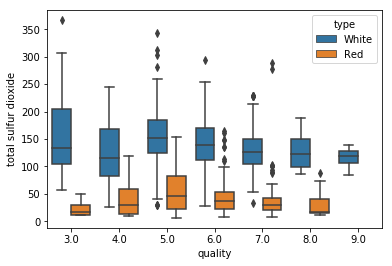

density


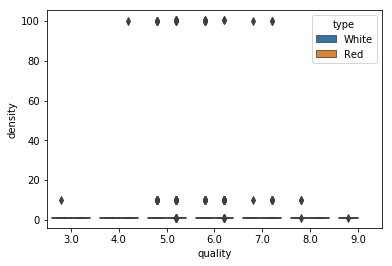

pH


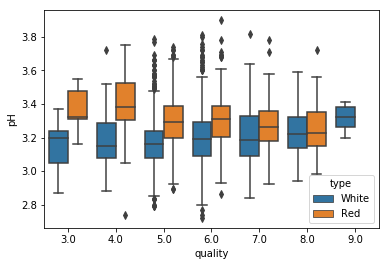

sulphates


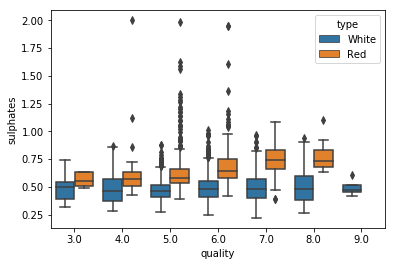

alcohol


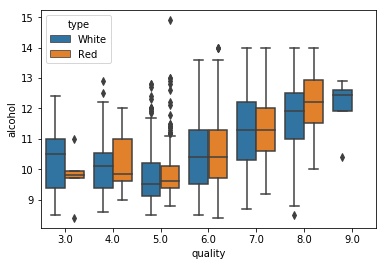

quality


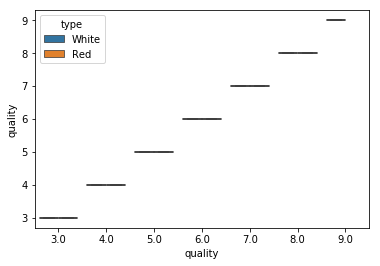

In [12]:
# let's look at whether features values change much from one type of wine to another and quality

for col in columns:
    print(col)
    sns.boxplot('quality', col, data=df, hue='type')
    plt.show()

Only the alcohol boxplot has similar values for red and white wine. Besides, the histograms presented earlier shows that the distributions are different for each wine kind. For these reasons, we will divide the dataset into two: one for the red wine and another for the white wines. 

In [13]:
white = df[df.type == 'White']
print('white dataset', white.shape)

red = df[df.type == 'Red']
print('red dataset', red.shape)

white dataset (2688, 13)
red dataset (972, 13)


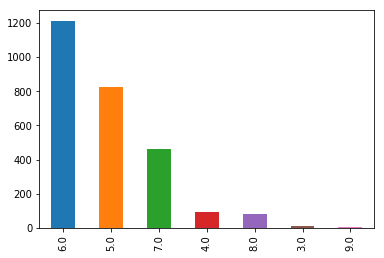

In [14]:
white['quality'].value_counts().plot(kind='bar');

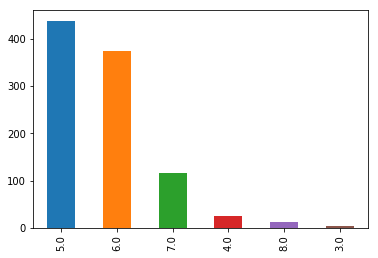

In [15]:
red['quality'].value_counts().plot(kind='bar');

fixed acidity


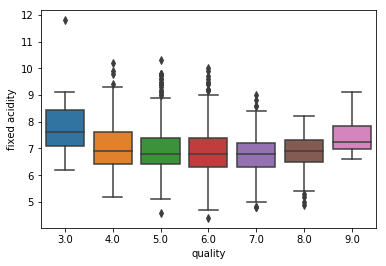

volatile acidity


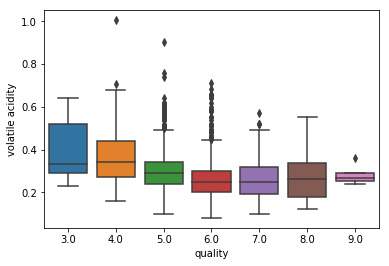

citric acid


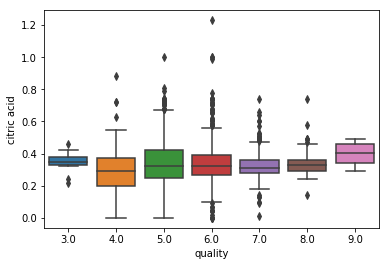

residual sugar


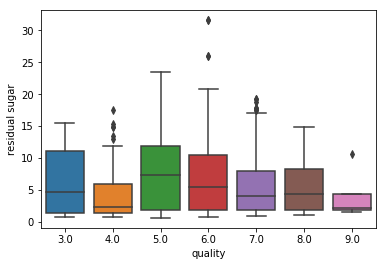

chlorides


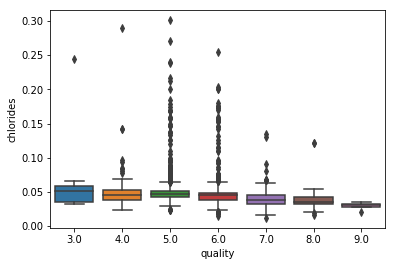

free sulfur dioxide


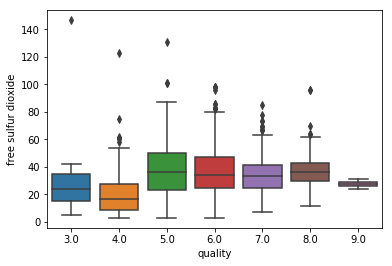

total sulfur dioxide


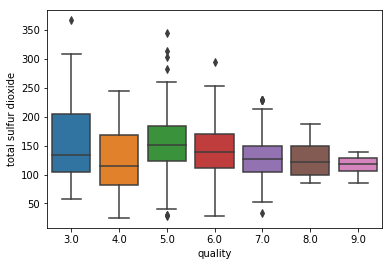

density


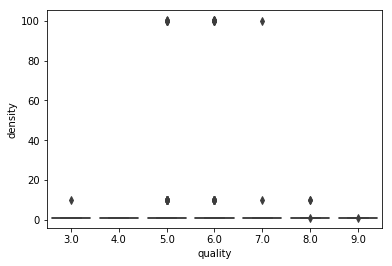

pH


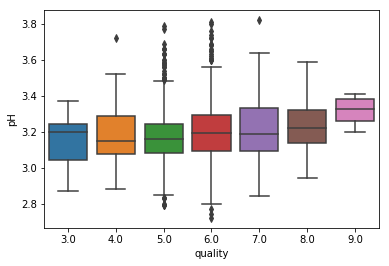

sulphates


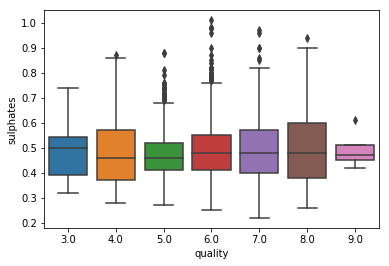

alcohol


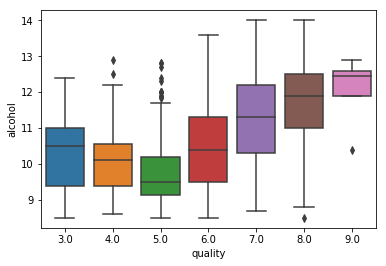

quality


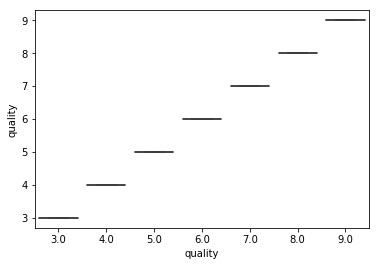

In [16]:
for col in columns:
    print(col)
    sns.boxplot('quality', col, data=white)
    plt.show()

fixed acidity


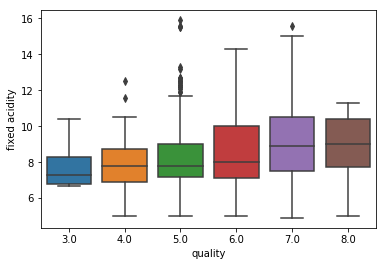

volatile acidity


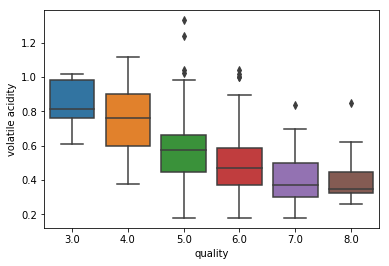

citric acid


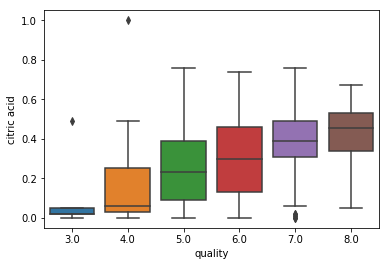

residual sugar


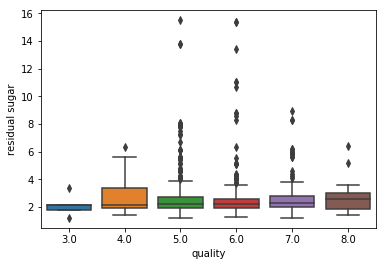

chlorides


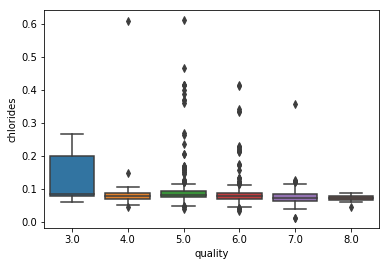

free sulfur dioxide


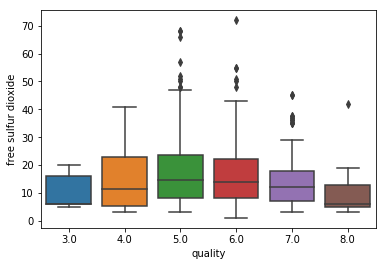

total sulfur dioxide


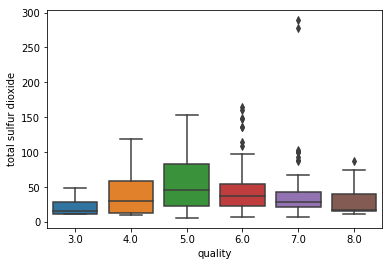

density


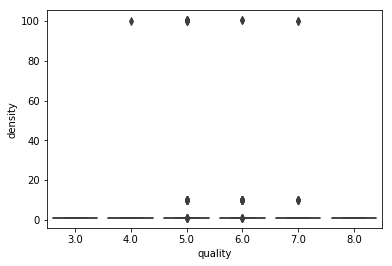

pH


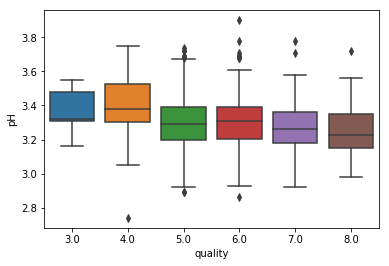

sulphates


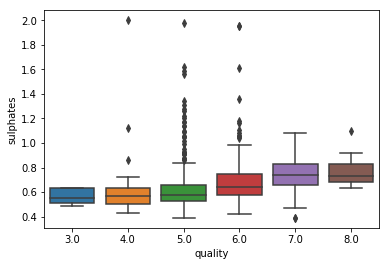

alcohol


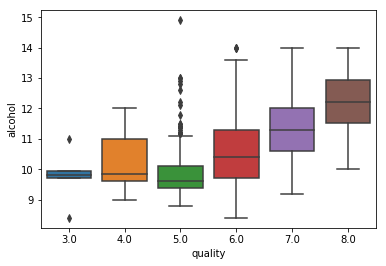

quality


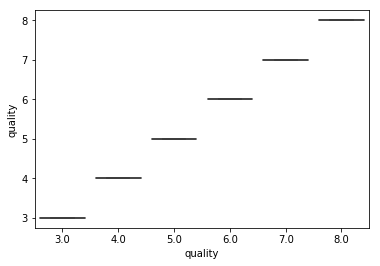

In [20]:
for col in columns:
    print(col)
    sns.boxplot('quality', col, data=red)
    plt.show()

## Modelling

Let's start with a simple model: logistic regression. This first model is important to show 
how much improvement is possible to obtain using a more advanced model.

### Logistic regression

In [21]:
y_white = white.quality
X_white = white.drop(columns={'quality', 'type'}, axis=1)

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white,
                                                                            test_size=0.2, 
                                                                            random_state=42)

In [22]:
y_red = red.quality
X_red = red.drop(columns={'quality', 'type'}, axis=1)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red,
                                                                            test_size=0.2, 
                                                                            random_state=42)

In [23]:
# data preprocessing: transforming the distributions to have 
# a mean value 0 and standard deviation of 1.

scaler_white = StandardScaler()
scaler_red = StandardScaler()

In [24]:
scaler_white.fit(X_train_white)
scaler_red.fit(X_train_red)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Transforming the data:
X_train_white = scaler_white.transform(X_train_white)
X_test_white = scaler_white.transform(X_test_white)

In [26]:
X_train_red = scaler_red.transform(X_train_red)
X_test_red = scaler_red.transform(X_test_red)

In [27]:
log_r_white = LogisticRegression(random_state=42).fit(X_train_white, y_train_white)

log_r_red = LogisticRegression(random_state=42).fit(X_train_red, y_train_red)

In [28]:
log_r_white_pred = log_r_white.predict(X_test_white)


In [29]:
log_r_red_pred = log_r_red.predict(X_test_red)

In [30]:
accuracy_score(y_test_white, log_r_white_pred)

0.5185873605947955

In [31]:
accuracy_score(y_test_red, log_r_red_pred)

0.558974358974359

Using the logistic regression model we obtained an accuracy of 0.52 for the white wine and for 0.54 the red wine.

### Random Forest

In [32]:
rf_white = RandomForestClassifier(random_state=42).fit(X_train_white, y_train_white) #starts and fit the model
rf_predict_white = rf_white.predict(X_test_white) #predicting the test data

# Confusion matrix and accuracy score
rf_conf_matrix_white = confusion_matrix(y_test_white, rf_predict_white)
rf_acc_score_white = accuracy_score(y_test_white, rf_predict_white)
print(rf_conf_matrix_white)
print('White Wine: accuracy score: %2f' % (rf_acc_score_white*100))

[[  0   0   1   0   0   0   0]
 [  0   5   7   6   0   0   0]
 [  0   5 108  47   2   0   0]
 [  0   2  52 184   9   0   0]
 [  0   0   9  38  43   0   0]
 [  0   0   0  10   5   3   0]
 [  0   0   0   2   0   0   0]]
White Wine: accuracy score: 63.754647


In [33]:
rf_red = RandomForestClassifier(random_state=42).fit(X_train_red, y_train_red) #starts and fit the model
rf_predict_red = rf_red.predict(X_test_red)
# Confusion matrix and accuracy score
rf_conf_matrix_red = confusion_matrix(y_test_red, rf_predict_red)
rf_acc_score_red = accuracy_score(y_test_red, rf_predict_red)
print(rf_conf_matrix_red)
print('Red Wine: accuracy score: %2f' % (rf_acc_score_red*100))

[[ 0  0  2  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  1 67 14  0  0]
 [ 0  0 32 44  4  0]
 [ 0  0  2  8 12  1]
 [ 0  0  0  2  1  1]]
Red Wine: accuracy score: 63.589744


To improve the accuracy score we will use grid search technique

In [34]:
# we will use grid search to tune models parameters

parameters = {'n_estimators':[100,150],
              'criterion':['gini', 'entropy'],
              'min_samples_split':[2,5,10],
              'max_features':[4,6,'auto'],
              'class_weight':['balanced', 'balanced_subsample', None]
              }

In [35]:
rf_gs_white = RandomForestClassifier(random_state=42)

rf_gs_red = RandomForestClassifier(random_state=42)

In [36]:
rf_gs_white = GridSearchCV(rf_gs_white, parameters, cv=5).fit(X_train_white, y_train_white)

In [37]:
# saving the best model 
rf_gs_best_white = rf_gs_white.best_estimator_

# looking at the best parameters
rf_gs_white.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [38]:
rf_gs_predict_white = rf_gs_white.predict(X_test_white)

In [39]:
# the final accuracy
best_result_white = rf_gs_white.best_score_
print('accuracy score: %2f' % (best_result_white*100))

accuracy score: 67.953488


Using the grid search technique we improved the white wine model accuracy from ~64% to 68%.

In [40]:
rf_gs_red = GridSearchCV(rf_gs_red, parameters, cv=5).fit(X_train_red, y_train_red)

/home/thamys/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
# saving the best model 
rf_gs_best_red = rf_gs_red.best_estimator_

# looking at the best parameters
rf_gs_red.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [42]:
rf_gs_predict_red = rf_gs_red.predict(X_test_red)

In [43]:
# the final accuracy
best_result_red = rf_gs_red.best_score_
print('accuracy score: %2f' % (best_result_red*100))

accuracy score: 69.884170


Using the grid search technique we improved the red wine model accuracy from ~64% to ~70%.

### SVM

In [44]:
svc_white = SVC(random_state=42).fit(X_train_white, y_train_white)
svc_white_pred = svc_white.predict(X_test_white)

In [45]:
svc_conf_matrix = confusion_matrix(y_test_white, svc_white_pred)
svc_acc_score = accuracy_score(y_test_white, svc_white_pred)
print(svc_conf_matrix)
print(svc_acc_score*100)

[[  0   0   1   0   0   0   0]
 [  0   2   8   8   0   0   0]
 [  0   2  94  66   0   0   0]
 [  0   1  43 194   9   0   0]
 [  0   0   4  74  12   0   0]
 [  0   0   0  13   5   0   0]
 [  0   0   0   2   0   0   0]]
56.13382899628253


In [46]:
svc_white_param = svc_white.get_params

In [47]:
svc_red = SVC(random_state=42).fit(X_train_red, y_train_red)
svc_red_pred = svc_red.predict(X_test_red)

In [48]:
svc_conf_matrix = confusion_matrix(y_test_red, svc_red_pred)
svc_acc_score = accuracy_score(y_test_red, svc_red_pred)
print(svc_conf_matrix)
print(svc_acc_score*100)

[[ 0  0  2  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0 65 17  0  0]
 [ 0  0 35 45  0  0]
 [ 0  0  0 19  4  0]
 [ 0  0  0  3  1  0]]
58.46153846153847


In [49]:
# We could use use grid search to test differente kernels 
# and try to improve accuracy. I tried it but as a 
# lot of computational power was needed I couldn't see the results.

#parameters_svc = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [50]:
#svc_gs_white = SVC(random_state=42)
#svc_gs_white = GridSearchCV(svc_gs_white, parameters_svc, cv=5).fit(X_train_white, y_train_white)

In [51]:
# saving the best model 
#svc_gs_best_white = svc_gs_white.best_estimator_

# looking at the best parameters
#svc_gs_best_white.best_estimator_.get_params()

In [52]:
#svc_gs_predict_white = svc_gs_white.predict(X_test_white)

In [53]:
# the final accuracy
#best_result_white = svc_gs_white.best_score_
#print('accuracy score: %2f' % (best_result_white*100))

In [54]:
#svc_gs_red = SVC(random_state=42)
#svc_gs_red = GridSearchCV(svc_gs_red, parameters_svc, cv=5).fit(X_train_red, y_train_red)

In [55]:
# saving the best model 
#svc_gs_best_red = svc_gs_red.best_estimator_

# looking at the best parameters
#svc_gs_best_red.best_estimator_.get_params()

In [56]:
#svc_gs_predict_red = svc_gs_red.predict(X_test_red)

In [57]:
# the final accuracy
#best_result_red = svc_gs_red.best_score_
#print('accuracy score: %2f' % (best_result_red*100))

## To be improved


- It is possible to test more hyperparameters in each model, but due to time it was not possible


- We could try to perform PCA analysis to verify if our variables can be explained by two principal vectors, for example


- Another way to analyze this dataset would be to create two labels: good and bad wine. The bad wine would be the ones with quality <= 5 and the good ones would have quality > 5. Using this simplification it would be possible to verify if the models could achieve a greater accuracy


- Besides accuracy, we should analyze the confusion matrix of each model. It is important to verify this metric to check if the model is addicted to classifying only one class


- We could also use the Voting Classifier model to try to increase the accuracy